In [1]:
## Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.tail()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [5]:
df.shape

(92016, 5)

In [6]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
df["FullDate"] =pd.to_datetime(df["FullDate"]) # convert column to datetime

In [8]:
df.FullDate.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   92016
unique                  92016
top       2010-09-01 00:00:00
freq                        1
first     2010-09-01 00:00:00
last      2021-02-28 23:00:00
Name: FullDate, dtype: object

In [9]:
df.set_index("FullDate", inplace=True)

In [10]:
df_copy = df.copy()

In [11]:
#downsampling
df_daily = df.resample('D').sum()
print(df_daily)


             Tmax      SysLoad  GasPrice  ElecPrice
FullDate                                           
2010-09-01  379.2  41565.38000   88.5600   2751.700
2010-09-02  369.6  38898.99000   88.5600    570.810
2010-09-03  439.2  41665.76000  106.8000    504.975
2010-09-04  328.8  35638.08500   81.3600    502.275
2010-09-05  357.6  35611.41000  106.8000    500.555
...           ...          ...       ...        ...
2021-02-24  537.6  -1525.49745  134.4000    634.770
2021-02-25  518.4   4539.07855  130.5048    577.515
2021-02-26  547.2   9517.02430  130.1808   1445.495
2021-02-27  564.0   4932.88015  130.0800    488.980
2021-02-28  583.2   6675.05485  131.6352    -98.985

[3834 rows x 4 columns]


In [12]:
df_daily.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

Text(0, 0.5, 'ElecPrice')

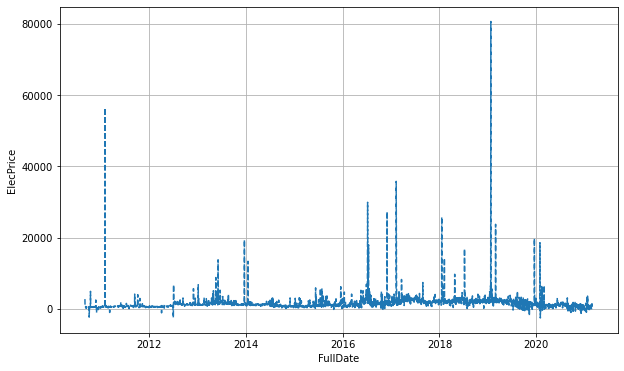

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.ElecPrice, '--')
plt.grid()
plt.xlabel('FullDate')
plt.ylabel('ElecPrice')

In [14]:
from statsmodels.tsa.stattools import adfuller

def adFullertest(dataframe, column):
  adf_result = adfuller(dataframe[column])
  print(f'p-value : {adf_result[1]}')
  print('Critical Values: ')
  for k, v in adf_result[4].items():
    print(f'     {k}: {v}')
  
adFullertest(df_daily, 'SysLoad')

# adf_result = adfuller(df_daily['SysLoad'])
# print(f'ADF Statistic: round({adf_result[0]}, 6)')
# print(f'p-value: {adf_result[1]}')
# print(f'No. of lags used: {adf_result[2]}')
# print(f'No. of observations used: {adf_result[3]}')
# print('Critical Values: ')
# for k, v in adf_result[4].items():
#   print(f'     {k}: {v}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


p-value : 0.004253725504574117
Critical Values: 
     1%: -3.432070672988693
     5%: -2.8623002987378547
     10%: -2.567174716967499


In [15]:
adFullertest( df_daily, 'GasPrice')

p-value : 0.04502721288462542
Critical Values: 
     1%: -3.4320693157877544
     5%: -2.8622996992165364
     10%: -2.5671743978048323


In [16]:
adFullertest(df_daily, 'ElecPrice')

p-value : 4.848817773711633e-13
Critical Values: 
     1%: -3.432066157296446
     5%: -2.8622983040036005
     10%: -2.5671736550459663


In [17]:
df_final = df_daily.reset_index()[['FullDate', 'ElecPrice']].rename({'FullDate': 'ds', 'ElecPrice': 'y'}, axis='columns')
df_final.head()
#df_final.query('temp != temp')

#df_final['temp'] = df_final['temp'].fillna(method='ffill')
#df_final['month'] = df_final['ds'].dt.month
#df_final.head()


,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [18]:
size = 2757
df_train = df_final.iloc[:size]
df_test = df_final.iloc[size:]
print(df_train.shape)
print(df_test.shape)

(2757, 2)
(1077, 2)


In [19]:
from fbprophet import Prophet

In [20]:
model = Prophet()

model.fit(df_train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
forecast = model.predict(df_test)


In [22]:
yTrue = np.array(df_test['y'])
yPred = np.array(forecast['yhat'])

In [23]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [24]:
print(round(mean_absolute_percentage_error(yTrue, yPred), 2))

549.48


In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(yTrue, yPred))
print(round(rms,2))

3218.16


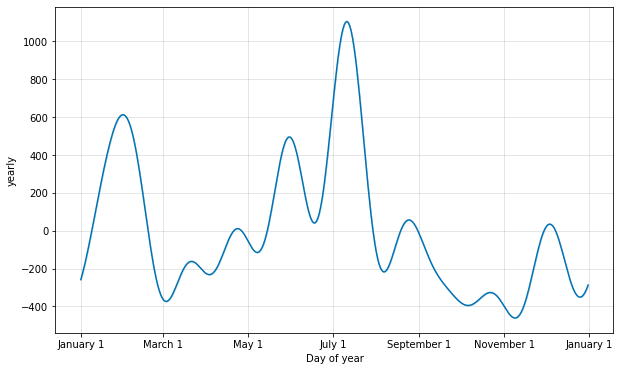

In [26]:
from fbprophet.plot import plot_yearly

plot_yearly(model)

In [27]:
#Multivariate Time series

multi_df = df_final = df_daily.reset_index()[['FullDate', 'ElecPrice', 'SysLoad','Tmax', 'GasPrice']].rename({'FullDate': 'ds', 'ElecPrice': 'y', 'SysLoad': 'add1','Tmax': 'add2', 'GasPrice': 'add3' }, axis='columns')
df_final.head()

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.380,379.2,88.56
1,2010-09-02,570.810,38898.990,369.6,88.56
2,2010-09-03,504.975,41665.760,439.2,106.80
3,2010-09-04,502.275,35638.085,328.8,81.36
4,2010-09-05,500.555,35611.410,357.6,106.80


In [28]:
df_train_multi = df_final.iloc[:size]
df_test_multi = df_final.iloc[size:]
print(df_train_multi.shape)
print(df_test_multi.shape)

(2757, 5)
(1077, 5)


In [29]:
m = Prophet()

# adding the regressors
m.add_regressor('add1')
m.add_regressor('add2')
m.add_regressor('add3')

In [30]:
m.fit(df_train_multi)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
multi_forecast =m.predict(df_test_multi)

In [32]:
multi_true = np.array(df_test_multi.y)
multi_pred = np.array(multi_forecast.yhat)

In [33]:
print(round(mean_absolute_percentage_error(multi_true, multi_pred), 2))

233.74


In [34]:
rmse = sqrt(mean_squared_error(multi_true, multi_pred))
print(round(rmse,2))

2709.65


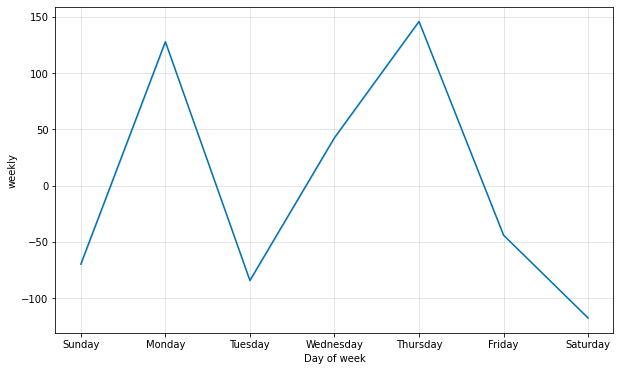

In [35]:
from fbprophet.plot import plot_weekly

plot_weekly(m)

In [36]:
# Question 20
multi_df = df_final = df_daily.reset_index()[['FullDate', 'ElecPrice', 'SysLoad', 'GasPrice']].rename({'FullDate': 'ds', 'ElecPrice': 'y', 'SysLoad': 'add1', 'GasPrice': 'add3' }, axis='columns')
df_final.head()

,ds,y,add1,add3
0,2010-09-01,2751.700,41565.380,88.56
1,2010-09-02,570.810,38898.990,88.56
2,2010-09-03,504.975,41665.760,106.80
3,2010-09-04,502.275,35638.085,81.36
4,2010-09-05,500.555,35611.410,106.80


In [37]:
df_train_multi2 = df_final.iloc[:size]
df_test_multi2 = df_final.iloc[size:]
print(df_train_multi2.shape)
print(df_test_multi2.shape)

(2757, 4)
(1077, 4)


In [38]:
m1 = Prophet()

# adding the regressors
m1.add_regressor('add1')
m1.add_regressor('add3')

In [39]:
m1.fit(df_train_multi2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
multi_forecast2 =m1.predict(df_test_multi2)

In [41]:
multi_true2 = np.array(df_test_multi2.y)
multi_pred2 = np.array(multi_forecast2.yhat)

In [42]:
print(round(mean_absolute_percentage_error(multi_true2, multi_pred2), 2))

236.66
